# Data Task

**Dataset link (there is also the description of the data): `https://www.kaggle.com/datasets/adilshamim8/education-and-career-success/data`**

### Objective

The goal of this part is to develop predictive models to estimate various career outcomes of students based on their educational background and life experiences. Specifically, we aim to predict the following career-related variables:
- `Job_Offers`
- `Starting_Salary`
- `Career_Satisfaction`
- `Years_to_Promotion`
- `Current_Job_Level`
- `Work_Life_Balance`
- `Entrepreneurship`

In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [77]:
df = pd.read_csv("education_career_success.csv")
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200.0,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000.0,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400.0,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400.0,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600.0,9,5,Entry,2,No


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Student_ID             5000 non-null   object 
 1   Age                    5000 non-null   int64  
 2   Gender                 5000 non-null   object 
 3   High_School_GPA        5000 non-null   float64
 4   SAT_Score              5000 non-null   int64  
 5   University_Ranking     5000 non-null   int64  
 6   University_GPA         5000 non-null   float64
 7   Field_of_Study         5000 non-null   object 
 8   Internships_Completed  5000 non-null   int64  
 9   Projects_Completed     5000 non-null   int64  
 10  Certifications         5000 non-null   int64  
 11  Soft_Skills_Score      5000 non-null   int64  
 12  Networking_Score       5000 non-null   int64  
 13  Job_Offers             5000 non-null   int64  
 14  Starting_Salary        5000 non-null   float64
 15  Care

In [79]:
df = df.drop(['Student_ID'], axis=1)

In [80]:
df["Gender"], GENDERS = pd.factorize(df["Gender"])
df["Field_of_Study"], FIELDS_OF_STUDY = pd.factorize(df["Field_of_Study"])
df["Current_Job_Level"], CURRENT_JOB_LEVELS = pd.factorize(df["Current_Job_Level"])
df["Entrepreneurship"], ENTREPRENEURSHIP = pd.factorize(df["Entrepreneurship"])

df[["Gender", "Field_of_Study", "Current_Job_Level", "Entrepreneurship"]].head()

,Gender,Field_of_Study,Current_Job_Level,Entrepreneurship
0,0,0,0,0
1,1,1,1,0
2,2,2,0,0
3,0,3,1,0
4,0,4,0,0


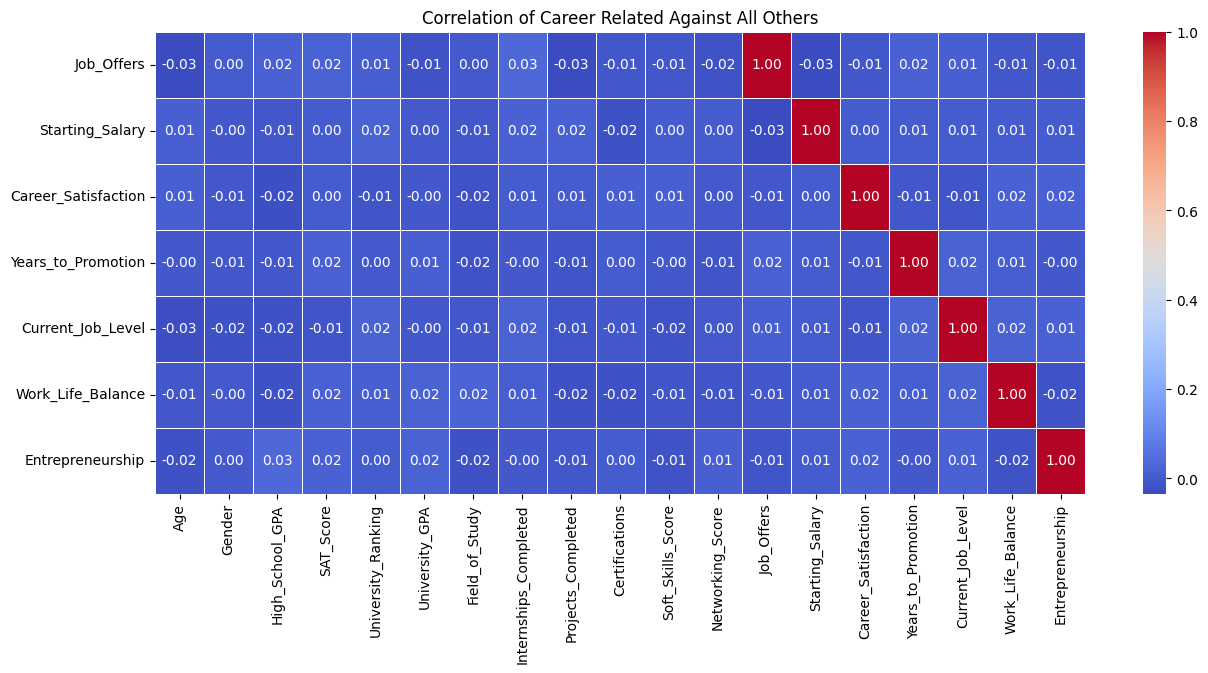

In [81]:
target_features = [
    "Job_Offers", "Starting_Salary", "Career_Satisfaction", 
    "Years_to_Promotion", "Current_Job_Level", 
    "Work_Life_Balance", "Entrepreneurship"
]

corr_matrix = df.corr()
selected_corr = corr_matrix[target_features]

plt.figure(figsize=(15, 6))
sns.heatmap(selected_corr.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation of Career Related Against All Others")
plt.show()